# TP: Machine Learning (SIA_3611)
# CROSETTO LUCA
## TP1: Clustering (4h) 

by Clément Bouvier 

In machine learning, clustering is related to unsupervised learning approaches in which the algorithm fits from the distribution of given data. The main advantage of such methods is detection without a priori of patterns, sorting data and detecting outliers.

The given dataset is a combination of a dataset produced by the World Health Organization and the location of countries. It pooled the evolution of 23 features for 15 years among numerous countries. One of the goals of this TP1 is to detect continents and subcontinents.

**Objectives:**
- Visualize spatial datasets
- Apply K-Means and GMM on spatial datasets
- Normalize the datasets
- Propose a methodology to detect specific pools of data
- Evaluate the computed clustering


## STEP 1: Spatial datasets and first clusters



The first step is visualizing the mercator projection.

**TO DO 1.1**

Execute the following cells

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors

df = pd.read_csv("Life_Expectancy_Data.csv")
#df = df.dropna() # remove this line allow to access to more countries (useful for later representations )
df.info()

df1 = df[(df.Year == 2013)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Longitude                        2938 non-null   float64
 2   Latitude                         2938 non-null   float64
 3   Continent                        2938 non-null   object 
 4   Year                             2938 non-null   int64  
 5   Status                           2938 non-null   object 
 6   Life_expectancy                  2928 non-null   float64
 7   Adult_mortality                  2928 non-null   float64
 8   Infant_deaths                    2938 non-null   int64  
 9   Alcohol                          2744 non-null   float64
 10  Percentage_expenditure           2938 non-null   float64
 11  Hepatitis_B                      2385 non-null   float64
 12  Measles             

C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\828182864.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


<module 'matplotlib.pyplot' from 'c:\\Users\\Luca\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

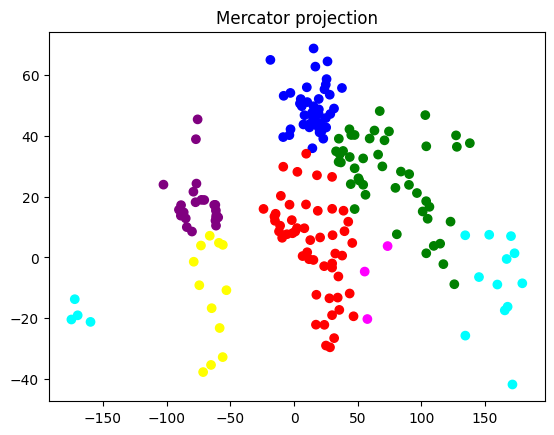

In [24]:
df_X = df1[['Longitude', 'Latitude']]
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.title("Mercator projection")
plt

**QUESTION 1**

**Identify each class with the plot colors.**

The plot colors follow the order of the country in the continent list : 
'Africa' == 'red'
'Asia' == 'green'
'Europe' == 'blue'
'North America' == 'purple'
'South America' == 'yellow'
'Seven seas' == 'magenta'
'Oceania' == 'cyan'


**What do the coordinates correspond to ?**

The coordinates correspond to the ['Longitude', 'Latitude'] country features



**TO DO 1.2**

Execute the following cell


<module 'matplotlib.pyplot' from 'c:\\Users\\Luca\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

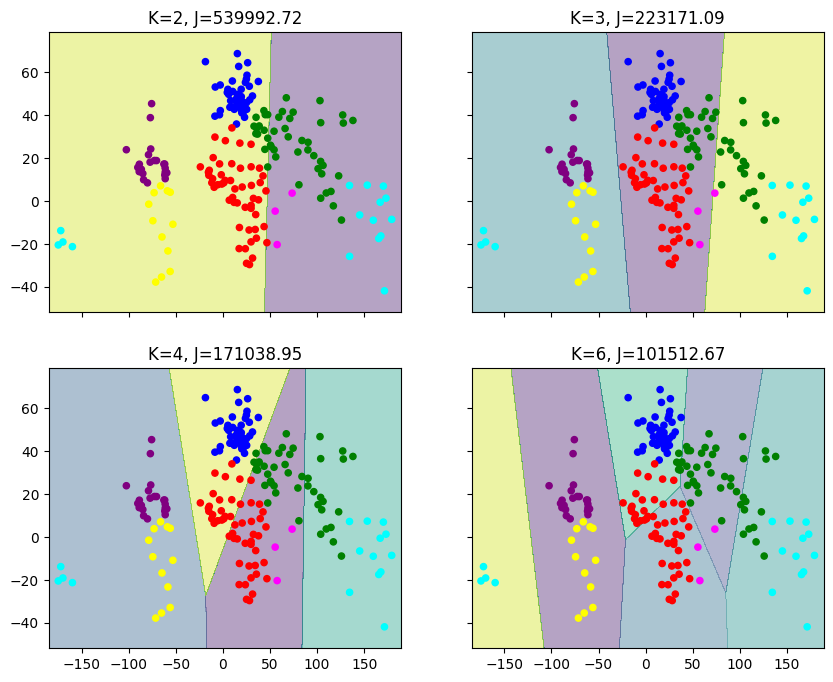

In [6]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

**QUESTION 2**

**How can Inertia be used to compare clusters? Can you propose a better metric for spatial datasets?**

Inertia (J) measures the sum of squared distances between data points (xi​) and their assigned cluster centroids (μk​). A lower Inertia is better ! And we can see J is decreasing when K increases. However, this doesn't always mean better clustering. I see a steep drop at first for J but it will eventually stabilize, and it's at this point that adding clusters is not useful.

 I can propose a better metric with a coherent number of clusters (K) corresponding to the number of continent : Here K needs to be equal to 7

**Which is the main problem with the mercator representation for continent detection?**

The mercator projection is not a central projection. That's why we can observe compacts clusters, a hard representation to identify properly the different continents. In addition we can see that 'cyan' color is cut in two parts with this representation, which is a bad thing for the analysis. 

## STEP 2: Spatial dataset normalization

**TO CODE 2.1**

Displace the origin of longitude to 30° east.

C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\978465605.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = (df_X['Longitude']-30 - 180) % 360 - 180
C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\978465605.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


<module 'matplotlib.pyplot' from 'c:\\Users\\Luca\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

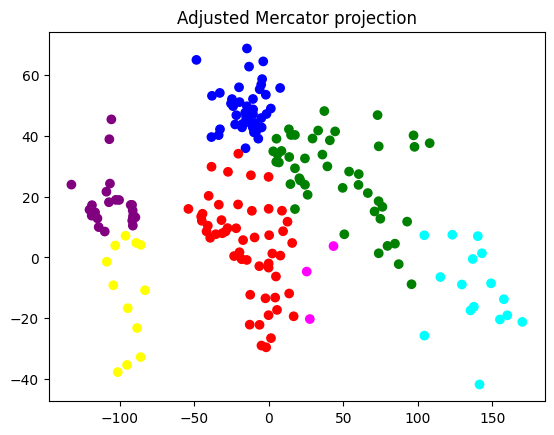

In [26]:
df_X = df1[['Longitude', 'Latitude']]
# Transformation of 'Longitude' values 
# df_X['Longitude'] - 30 shift the values 30° to the east
# We add a -180° to re-centered the coordonates
# Finally, % 360 - 180 ensures that all longitudes are wrapped within the 0 to 360 degrees and back to [-180;180]
df_X['Longitude'] = (df_X['Longitude']-30 - 180) % 360 - 180 
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0] , np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.title("Adjusted Mercator projection")
plt

**QUESTION 3**

**What are the advantages of this normalization ?**

Each continents forms a point group without being separated

**TO CODE 2.2**

Apply KMeans to the new normalized dataset.

<module 'matplotlib.pyplot' from 'c:\\Users\\Luca\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

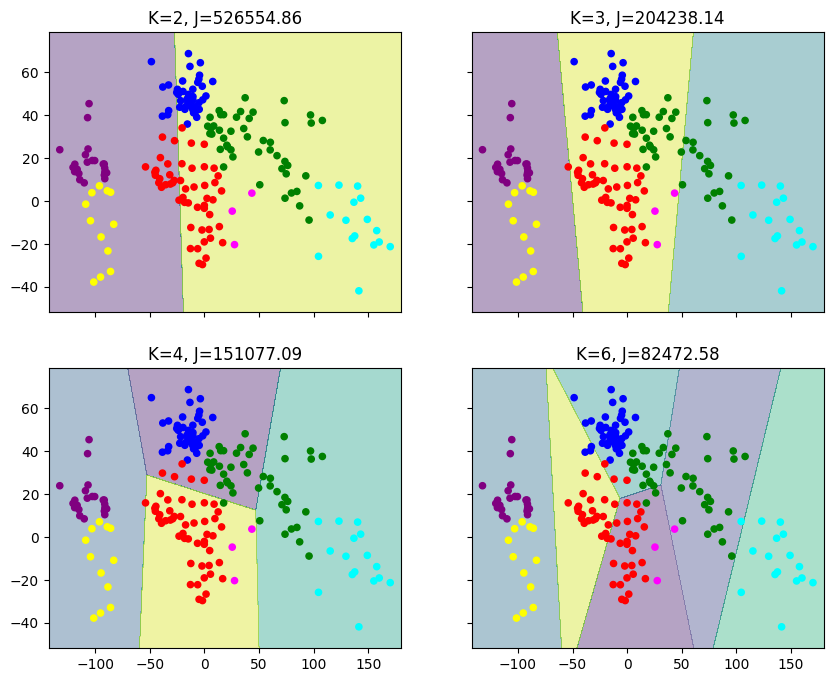

In [27]:
from itertools import product
from sklearn import cluster

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10 
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

km2 = cluster.KMeans(n_clusters=2).fit(np1)
km3 = cluster.KMeans(n_clusters=3).fit(np1)
km4 = cluster.KMeans(n_clusters=4).fit(np1)
km6 = cluster.KMeans(n_clusters=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, km, tt in zip(product([0, 1], [0, 1]),
                        [km2, km3, km4, km6],
                        ["K=2, J=%.2f" % km2.inertia_,
                         "K=3, J=%.2f" % km3.inertia_, 
                         "K=4, J=%.2f" % km4.inertia_, 
                         "K=6, J=%.2f" % km6.inertia_]):

    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

Gaussian Mixture Model is a clustering method allowing soft boundaries.

This method can be used through a [sklearn function](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html "Gaussian Mixture")

**TO CODE 2.3**

Apply GMM to the normalized dataset.

You have to test 3 conditions:

- GMM with default parameters for 2, 3, 4 and 6 components

- GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

- GMM with random initialization for 2, 3, 4 and 6 components

<module 'matplotlib.pyplot' from 'c:\\Users\\Luca\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

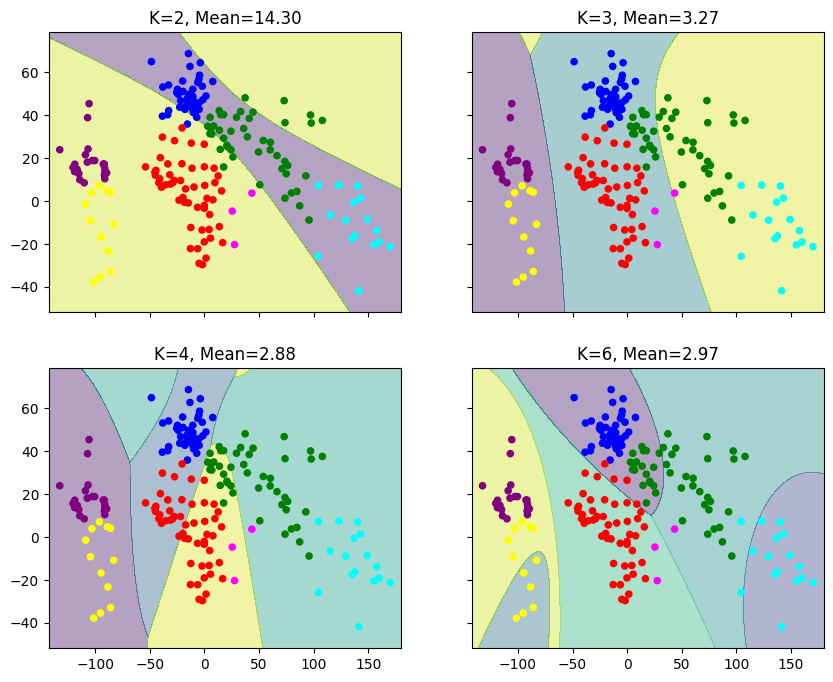

In [9]:
#GMM with default parameters for 2, 3, 4 and 6 components
from itertools import product
from sklearn import mixture

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10 
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gm2 = mixture.GaussianMixture(n_components=2).fit(np1)
gm3 = mixture.GaussianMixture(n_components=3).fit(np1)
gm4 = mixture.GaussianMixture(n_components=4).fit(np1)
gm6 = mixture.GaussianMixture(n_components=6).fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gm, tt in zip(product([0, 1], [0, 1]),
                        [gm2, gm3, gm4, gm6],
                        ["K=2, Mean=%.2f" % gm2.means_.mean(), #.mean() to mean the array values
                         "K=3, Mean=%.2f" % gm3.means_.mean(), 
                         "K=4, Mean=%.2f" % gm4.means_.mean(), 
                         "K=6, Mean=%.2f" % gm6.means_.mean()]):

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

<module 'matplotlib.pyplot' from 'c:\\Users\\Luca\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

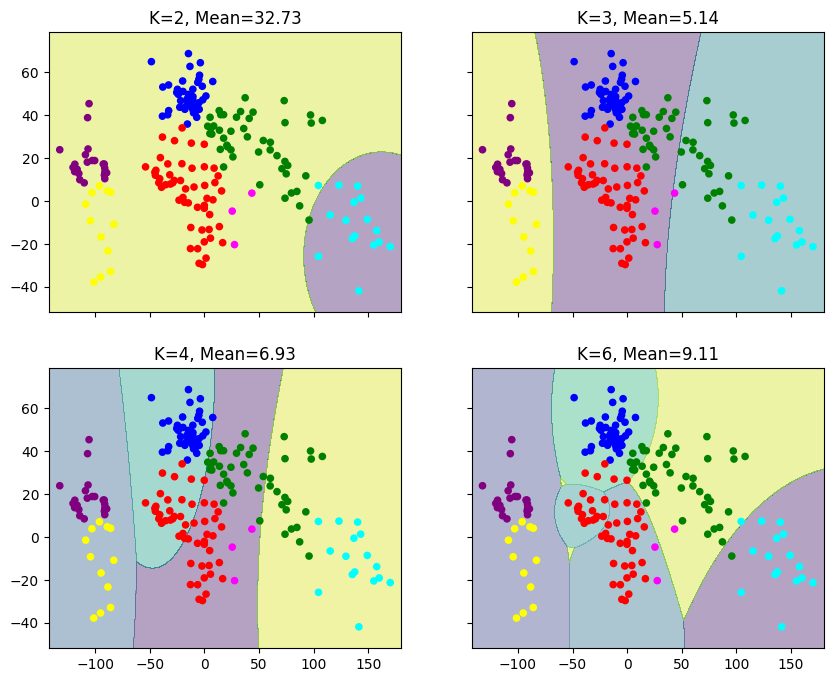

In [10]:
# GMM with diagonal covariance matrix for 2, 3, 4 and 6 components

from itertools import product
from sklearn import mixture

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10 
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gm2 = mixture.GaussianMixture(n_components=2, covariance_type="diag").fit(np1) #covariance_type="diag"
gm3 = mixture.GaussianMixture(n_components=3, covariance_type="diag").fit(np1)
gm4 = mixture.GaussianMixture(n_components=4, covariance_type="diag").fit(np1)
gm6 = mixture.GaussianMixture(n_components=6, covariance_type="diag").fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gm, tt in zip(product([0, 1], [0, 1]),
                        [gm2, gm3, gm4, gm6],
                        ["K=2, Mean=%.2f" % gm2.means_.mean(), 
                         "K=3, Mean=%.2f" % gm3.means_.mean(), 
                         "K=4, Mean=%.2f" % gm4.means_.mean(), 
                         "K=6, Mean=%.2f" % gm6.means_.mean()]):

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     


<module 'matplotlib.pyplot' from 'c:\\Users\\Luca\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

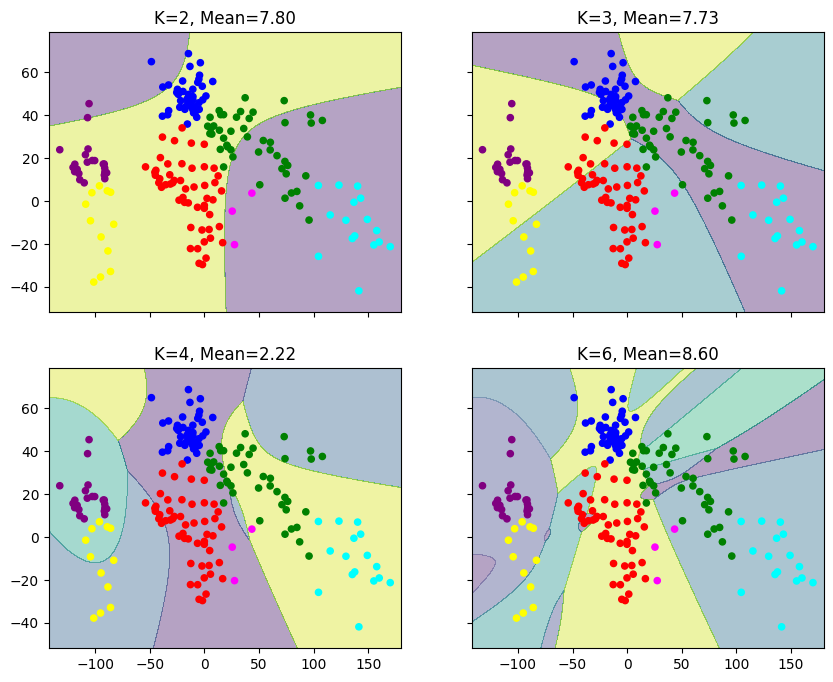

In [11]:
# GMM with random initialization for 2, 3, 4 and 6 components
from itertools import product
from sklearn import mixture

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10 
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gm2 = mixture.GaussianMixture(n_components=2, init_params="random").fit(np1) #init_params="random"
gm3 = mixture.GaussianMixture(n_components=3,init_params="random").fit(np1)
gm4 = mixture.GaussianMixture(n_components=4,init_params="random").fit(np1)
gm6 = mixture.GaussianMixture(n_components=6,init_params="random").fit(np1)

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, gm, tt in zip(product([0, 1], [0, 1]),
                        [gm2, gm3, gm4, gm6],
                        ["K=2, Mean=%.2f" % gm2.means_.mean(), #.mean() to mean the array values
                         "K=3, Mean=%.2f" % gm3.means_.mean(), 
                         "K=4, Mean=%.2f" % gm4.means_.mean(), 
                         "K=6, Mean=%.2f" % gm6.means_.mean()]):

    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    axarr[idx[0], idx[1]].set_title(tt)

plt     

**QUESTION 4**

**Which is the best method to detect continents?**

The second method of the GMM with the "diag" feature seems to be the best solution, contrary of random state (losing information, and useful for testing robustness). We want to find an analysis near to the mercator representation of countries (uncorrelated features). For the default method, it provides a good balance but the "diag" works better.  

**For this method, what would be the probability to find a country in the coordinates [-50, -40]? What methodology can you think of to detect unpopulated oceans?**


In [31]:
# I take K=6
gmm = mixture.GaussianMixture(n_components=6, covariance_type='diag', random_state=0)
gmm.fit(np1)

coordinates = np.array([[-50, -40]])

# Calculate the log-probability and convert it to probability
log_prob = gmm.score_samples(coordinates)
probability = np.exp(log_prob)

print(f"Probability of finding a country at [-50, -40]: {probability}")

Probability of finding a country at [-50, -40]: [3.67903645e-09]


To detect unpopulated regions like oceans using GMM, the goal is to find areas in the geographical space where the probability density is low. After that we can define the center cluster as the centers of the empty areas. 

**BONUS**

Rather than applying the previous longitudinal normalization in the mercator projected data and applying k-means, we could directly apply k-means on the unit-sphere representing the earth. The cosine similarity thus becomes a more suitable similarity measure than the euclidean distance.

Apply a KMeans with cosine similarity on the sphere instead of the previously tested euclidean distance in the plane.

## STEP 3: Detection of caribbean island 

**TO CODE 3.1**

Isolate the North and South American continents.

In [12]:
America = df[(df.Continent == "North America") | (df.Continent == "South America")]
America.info()
America

<class 'pandas.core.frame.DataFrame'>
Index: 530 entries, 64 to 2873
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          530 non-null    object 
 1   Longitude                        530 non-null    float64
 2   Latitude                         530 non-null    float64
 3   Continent                        530 non-null    object 
 4   Year                             530 non-null    int64  
 5   Status                           530 non-null    object 
 6   Life_expectancy                  528 non-null    float64
 7   Adult_mortality                  528 non-null    float64
 8   Infant_deaths                    530 non-null    int64  
 9   Alcohol                          497 non-null    float64
 10  Percentage_expenditure           530 non-null    float64
 11  Hepatitis_B                      474 non-null    float64
 12  Measles                  

,Country,Longitude,Latitude,Continent,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness _1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
64,Antigua and Barbuda,-61.794693,17.277500,North America,2015,Developing,76.4,13.0,0,NaN,...,86.0,NaN,99.0,0.2,13566.95410,NaN,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,-61.794693,17.277500,North America,2014,Developing,76.2,131.0,0,8.56,...,96.0,5.54,99.0,0.2,12888.29667,NaN,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,-61.794693,17.277500,North America,2013,Developing,76.1,133.0,0,8.58,...,98.0,5.33,99.0,0.2,12224.86416,NaN,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,-61.794693,17.277500,North America,2012,Developing,75.9,134.0,0,8.18,...,97.0,5.39,98.0,0.2,12565.44197,NaN,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,-61.794693,17.277500,North America,2011,Developing,75.7,136.0,0,7.84,...,99.0,5.65,99.0,0.1,11929.34991,NaN,3.3,3.3,0.782,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2869,Venezuela (Bolivarian Republic of),-66.181841,7.124224,South America,2004,Developing,73.3,161.0,10,7.55,...,83.0,4.78,86.0,0.1,NaN,NaN,1.7,1.6,0.687,11.6
2870,Venezuela (Bolivarian Republic of),-66.181841,7.124224,South America,2003,Developing,72.4,172.0,10,6.30,...,86.0,4.93,68.0,0.1,NaN,NaN,1.7,1.6,0.688,11.6
2871,Venezuela (Bolivarian Republic of),-66.181841,7.124224,South America,2002,Developing,73.1,167.0,10,6.89,...,81.0,4.93,65.0,0.1,NaN,NaN,1.7,1.7,0.684,11.0
2872,Venezuela (Bolivarian Republic of),-66.181841,7.124224,South America,2001,Developing,72.5,169.0,10,8.05,...,87.0,5.21,7.0,0.1,NaN,NaN,1.8,1.7,0.672,10.4


C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\1447717832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = (df_X['Longitude']-30 - 180) % 360 - 180 #Normalization
C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\1447717832.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['North America', 'South America'], [0, 1])


<module 'matplotlib.pyplot' from 'c:\\Users\\Luca\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

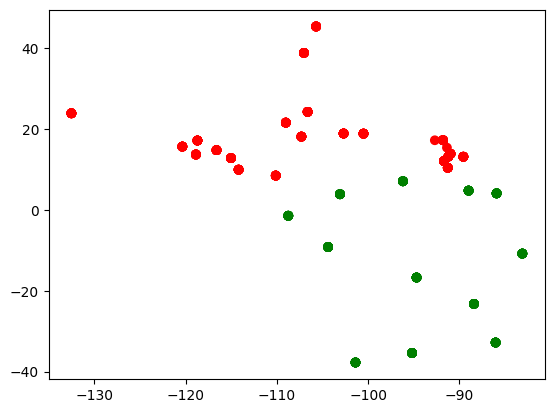

In [13]:
df_X = America[['Longitude', 'Latitude']]
df_X['Longitude'] = (df_X['Longitude']-30 - 180) % 360 - 180 #Normalization
df_Status = America['Continent']

df_Y = df_Status.replace(['North America', 'South America'], [0, 1])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green']))
plt

**TO CODE 3.2**

Propose a methodology to create a cluster including caribbean independent nations.

We can use GMM method with ' covariance_type="diag" 'feature with values and identify with colors our differents point groups

In [14]:
df2 = pd.concat([df1[(df.Continent == 'North America')],df1[(df.Continent == 'South America')]])
caribbean_countries = ['Dominican Republic', 'Haiti', 'Jamaica', 'Trinidad and Tobago','Saint Vincent and the Grenadines','Saint Lucia','Saint Kitts and Nevis','Grenada','Dominica','Cuba','Antigua and Barbuda','Barbados','Bahamas']
df2['Continent'] = np.where(df2['Country'].isin(caribbean_countries), 'Caribbean', df2['Continent'])

df2

C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\3679257832.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = pd.concat([df1[(df.Continent == 'North America')],df1[(df.Continent == 'South America')]])
C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\3679257832.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = pd.concat([df1[(df.Continent == 'North America')],df1[(df.Continent == 'South America')]])


,Country,Longitude,Latitude,Continent,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,...,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,Thinness _1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
66,Antigua and Barbuda,-61.794693,17.277500,Caribbean,2013,Developing,76.1,133.0,0,8.58,...,98.0,5.33,99.0,0.2,12224.864160,NaN,3.3,3.3,0.781,13.9
162,Bahamas,-76.628430,24.290367,Caribbean,2013,Developing,74.8,172.0,0,9.42,...,97.0,7.50,97.0,0.1,NaN,NaN,2.5,2.5,0.790,12.6
210,Barbados,-59.559797,13.181454,Caribbean,2013,Developing,75.2,11.0,0,8.74,...,91.0,7.57,91.0,0.1,15472.781400,NaN,3.8,3.8,0.792,15.3
258,Belize,-88.710105,17.200275,North America,2013,Developing,69.8,18.0,0,6.56,...,95.0,5.79,95.0,0.2,4688.538443,344181.0,3.4,3.4,0.706,12.9
498,Canada,-75.697000,45.424724,North America,2013,Developing,81.8,67.0,2,8.20,...,91.0,1.67,91.0,0.1,52413.721160,35155451.0,0.5,0.5,0.909,15.9
627,Costa Rica,-84.192088,9.976345,North America,2013,Developing,79.4,96.0,1,3.42,...,95.0,9.47,95.0,0.1,1569.666310,47641.0,1.7,1.7,0.762,13.7
659,Cuba,-79.016054,21.622895,Caribbean,2013,Developing,78.7,96.0,1,4.18,...,99.0,9.48,99.0,0.1,676.153440,NaN,3.4,3.3,0.773,14.7
769,Dominica,-61.357726,15.439470,Caribbean,2013,Developing,NaN,NaN,0,0.01,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
772,Dominican Republic,-70.505689,18.894331,Caribbean,2013,Developing,73.4,157.0,6,5.93,...,82.0,4.12,83.0,0.3,627.555440,1281296.0,3.3,3.2,0.709,13.2
820,El Salvador,-88.871645,13.739437,North America,2013,Developing,73.0,184.0,2,2.42,...,92.0,6.95,92.0,0.2,3895.664491,625777.0,1.6,1.6,0.675,13.2


C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\2252101858.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = (df_X['Longitude']-30 - 180) % 360 - 180 #Normalization
C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\2252101858.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['North America', 'South America', 'Caribbean'], [0, 1, 2])


<module 'matplotlib.pyplot' from 'c:\\Users\\Luca\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

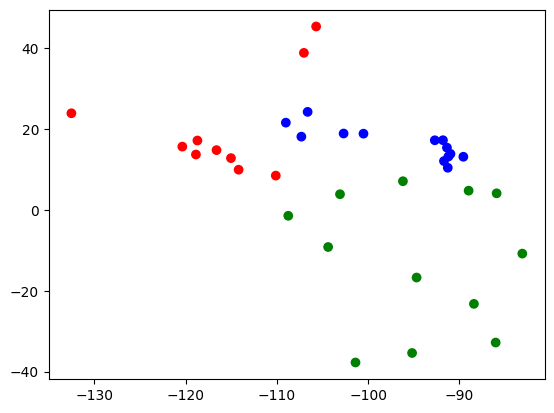

In [33]:
import matplotlib.colors

df_X = df2[['Longitude', 'Latitude']]
df_X['Longitude'] = (df_X['Longitude']-30 - 180) % 360 - 180 #Normalization
df_Status = df2['Continent']

df_Y = df_Status.replace(['North America', 'South America', 'Caribbean'], [0, 1, 2])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue']))
plt

<module 'matplotlib.pyplot' from 'c:\\Users\\Luca\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

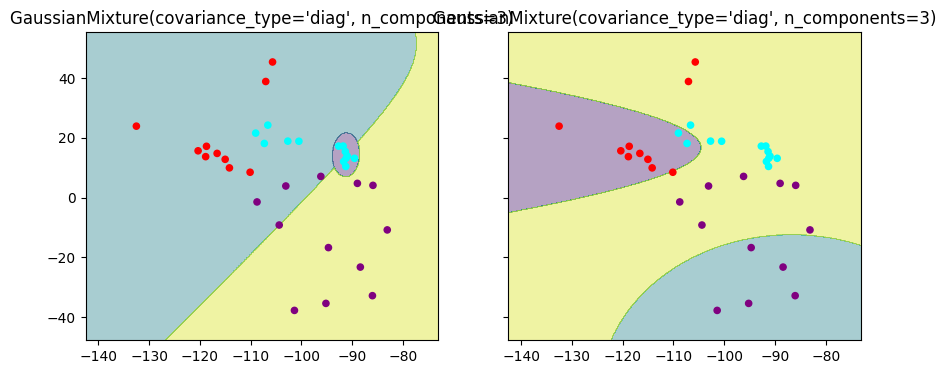

In [36]:
from sklearn import mixture

x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10 
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

gm2 = mixture.GaussianMixture(n_components=3,covariance_type="diag").fit(np1) #covariance_type="diag"
gm3 = mixture.GaussianMixture(n_components=3, covariance_type="diag" ).fit(np1)


f, axarr = plt.subplots(1, 2, sharex='col', sharey='row', figsize=(10, 4))

for idx, gm in zip(axarr,[gm2,gm3]):
    Z = gm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    idx.contourf(xx, yy, Z, alpha=0.4)
    idx.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                                  s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
    idx.set_title(gm)

plt     


**QUESTION 5**

Which is the outlier of this clustering problem? We've got difficulties to identify the clusters of North and South america beacause of separated extremum points 

## STEP 4 : Evaluating a cluster

In this section, we try to evaluate the quality of the different clusters computed.

**TO DO 4.1**
Execute the following cells. On the first cell, you can add code to once again displace the longitude by 30° east.

C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\3736464803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_X['Longitude'] = (df_X['Longitude']-30 - 180) % 360 - 180
C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\3736464803.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])


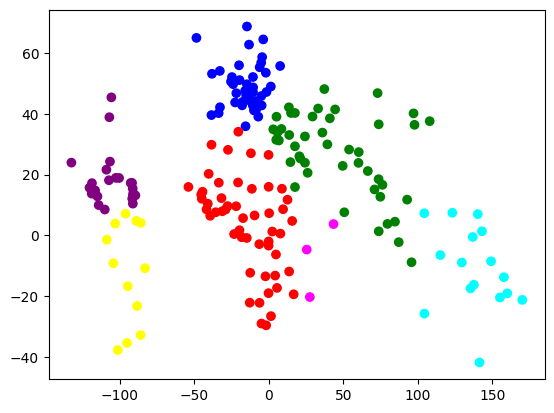

In [37]:
df_X = df1[['Longitude', 'Latitude']]
df_X['Longitude'] = (df_X['Longitude']-30 - 180) % 360 - 180
df_Status = df1[['Continent']]

df_Y = df_Status.replace(['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Seven seas', 'Oceania'], [0, 1, 2, 3, 4, 5, 6])
np_Y = df_Y.to_numpy()
np_Y = np_Y.reshape((np_Y.shape[0],))

np1 = df_X.to_numpy()
plt.scatter(np1[:,0], np1[:,1], c=np_Y, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))
plt.show()


In [38]:
x_min, x_max = np1[:, 0].min() - 10, np1[:, 0].max() + 10
y_min, y_max = np1[:, 1].min() - 10, np1[:, 1].max() + 10
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

For n_clusters = 3 The average silhouette_score is : 0.5606777583656894


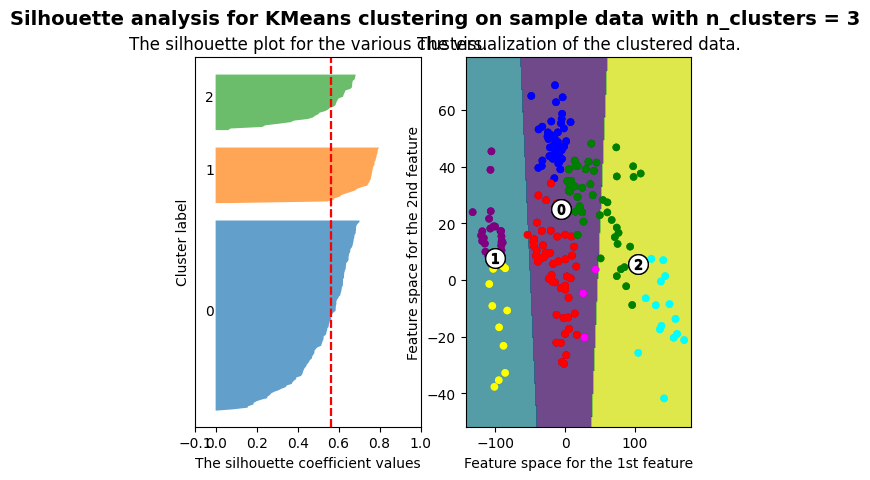

In [39]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**TO DO 4.2**

Apply the previous code for different values of K (2,3,4 and 6).

For n_clusters = 2 The average silhouette_score is : 0.4038892737804751


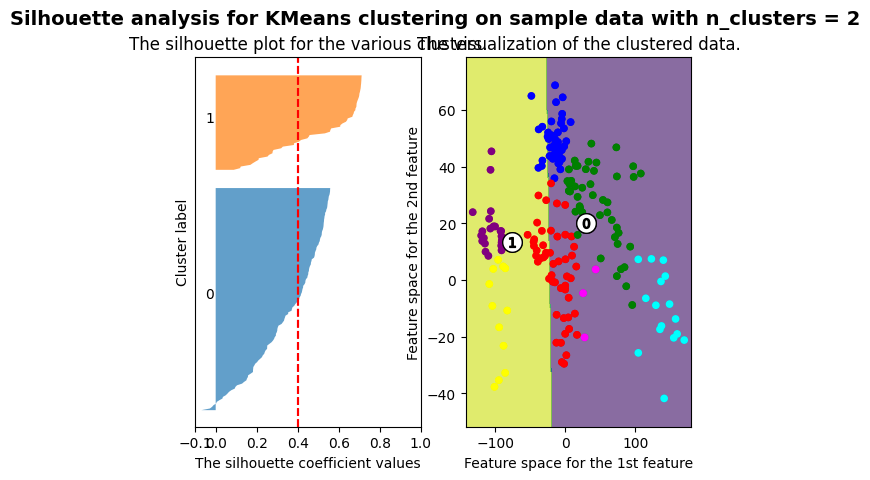

In [40]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 2 #Case 1

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 4 The average silhouette_score is : 0.44464926591415543


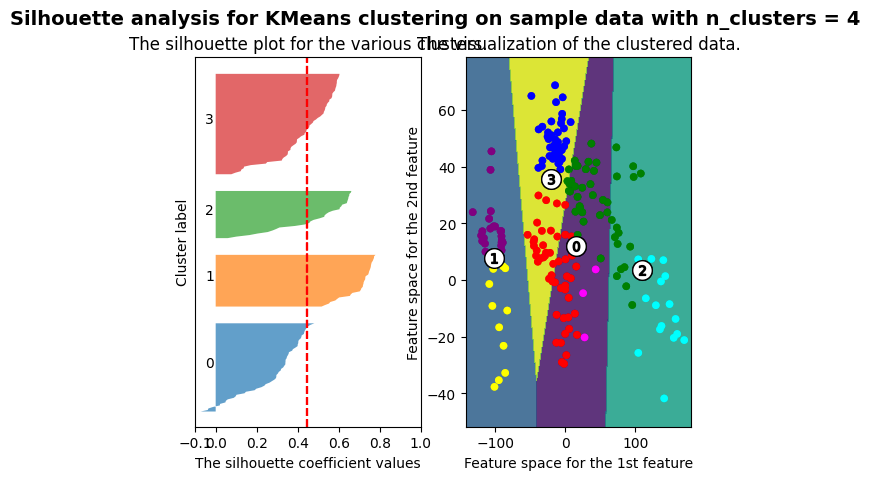

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 4 #Case 2

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

For n_clusters = 6 The average silhouette_score is : 0.4880418409926787


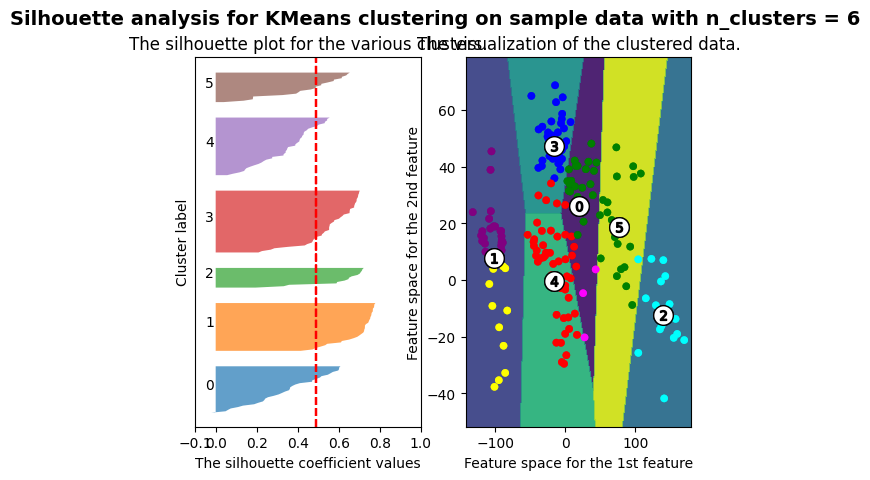

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score

K = 6 #Case 3

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**Question 6** 

**According to the silhouette score and the silhouette analysis, which is the most relevant value of K ? Justify your response.**

According to the various figures, the best case is where K=6. Even if there are a few errors, the majority of continents fall within a specific cluster. This is not the case in situations with lower K, as there aren't enough clusters for each continent. 

**BONUS** 

Compute the silhouette score and analyze it for different number of components and parameters of Gaussian Mixture.

**TO CODE 4.3**

Another way to evaluate the quality of the clustering is through the homogeneity. This metric require a ground truth, so it can't be computed for every clustering problem. Luckily, we do have a ground truth here. Compute the [homogeneity score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html "Homogeneity score") for different values of K.

For n_clusters = 6 The average silhouette_score is : 0.4880418409926787


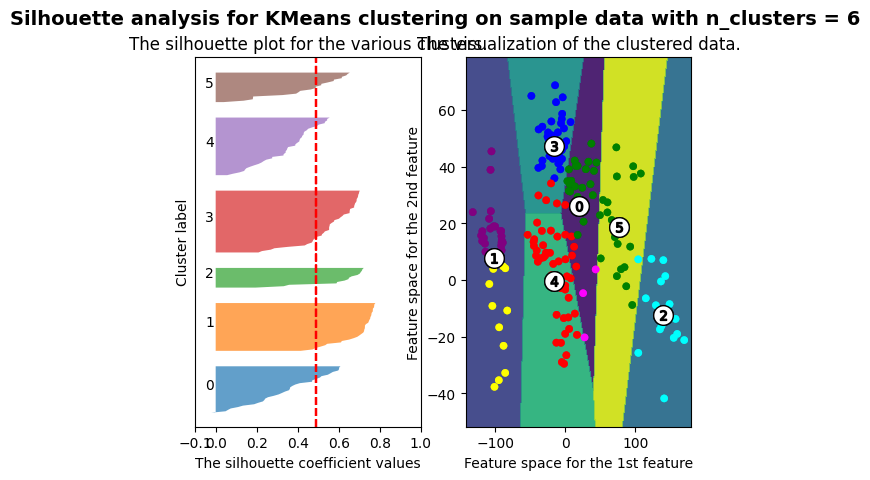

In [48]:
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_score
K = 6

fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(np1) + (K + 1) * 10])

km = cluster.KMeans(n_clusters=K, random_state=10)
cluster_labels = km.fit_predict(np1)

silhouette_avg = silhouette_score(np1, cluster_labels)
# homogeneity_score = homogeneity_score(np1, cluster_labels)
print("For n_clusters =", K, "The average silhouette_score is :", silhouette_avg)
sample_silhouette_values = silhouette_samples(np1, cluster_labels)

y_lower = 10
for i in range(K):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax2.contourf(xx, yy, Z, alpha=0.4)
    ax2.scatter(np1[:, 0], np1[:, 1], c=np_Y,
                s=20, cmap=matplotlib.colors.ListedColormap(['red', 'green', 'blue', 'purple', 'yellow', 'magenta', 'cyan']))

    # Labeling the clusters
    centers = km.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % K,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

**Question 7**

According to the homogeneity score, which is the most relevant value of K ?

**BONUS**
Compute the homogeneity score and analyze it for different number of components and parameters of Gaussian Mixture.

## BONUS STEP 5: Alcoholism

This step is entirely optional and combines all the methods you used for this 3 TPs course.

The main goal is to develop a complete methodology to answer general questions.

All questions have to be justified by your homemade methodology and your methodology has also to be justified.

**QUESTION 1**

In the year 2000, which countries are heavily concerned by an Alcohol issue?

**QUESTION 2**

In these countries and in 2000, which are the parameters linked with Alcoholism? How do you explain these links?

**QUESTION 3**

Which is the evolution trend in these countries between 2000 and 2015? Try to separate these different trends.

**QUESTION 4**

By selecting a specific country, can you explain a decrease or an increase through specific policies?

**QUESTION 1**

In [60]:
df5 = df[(df.Year == 2000)]

alcohol_data_2000 = df5[['Country', 'Alcohol']]

mean_alcohol = alcohol_data_2000['Alcohol'].mean()

print(f"La moyenne des valeurs d'alcool pour l'année 2000 est : {mean_alcohol}")

La moyenne des valeurs d'alcool pour l'année 2000 est : 4.570714285714286


On considère les pays > a cette moyenne comme fortement concernés

In [62]:
countries_2000= alcohol_data_2000[alcohol_data_2000['Alcohol'] > mean_alcohol]

countries_2000

,Country,Alcohol
79,Antigua and Barbuda,7.27
95,Argentina,7.68
127,Australia,10.17
143,Austria,13.20
175,Bahamas,12.15
...,...,...
2729,Uganda,10.47
2777,United Kingdom of Great Britain and Northern I...,10.59
2809,United States of America,8.21
2825,Uruguay,6.65


**QUESTION 2**

In [68]:
df_list = df5[df['Alcohol'] > mean_alcohol] 

#df_list
# Je selectionne quelques paramètres pour observer la valeur de la moyenne
mean_alcohol = df_list['Alcohol'].mean()
mean_Life_expectancy = df_list['Life_expectancy'].mean()
mean_Adult_mortality = df_list['Adult_mortality'].mean()
mean_Infant_deaths = df_list['Infant_deaths'].mean()
mean_GDP = df_list['GDP'].mean()


print(f"Mean Alcohol : {mean_alcohol}")
print(f"Mean Life_expectancy : {mean_Life_expectancy}")
print(f"Mean Adult_mortality : {mean_Adult_mortality}")
print(f"Mean Infants_deaths : {mean_Infant_deaths}")
print(f"Mean GDP : {mean_GDP}")



Mean Alcohol : 8.507012987012988
Mean Life_expectancy : 71.46363636363637
Mean Adult_mortality : 155.55844155844156
Mean Infants_deaths : 16.571428571428573
Mean GDP : 8596.646280155386


C:\Users\Luca\AppData\Local\Temp\ipykernel_7804\4107432868.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_list = df5[df['Alcohol'] > mean_alcohol]
